<a href="https://colab.research.google.com/github/erinetaylor/AChemLab/blob/main/KernelQuestII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍿 KernelQuest II: Statistical Analysis of Popcorn Kernels

Using this **COLAB notebook**, we will upload the combined data from last week's lab, and use different statistical calculations to answer the questions provided in the Post Lab questions for Lab 2 - KernelQuest II: Statistical Analysis of Popcorn Kernels.


## Let's get started! 😀

First things first.

<font color='green'>Please **download** the popcorn_data.csv file from Canvas to your computer.</font>

# Part One

Let's start out by uploading our data into this notebook.

<font color='green'>Start by executing the code below by clicking on the cell and **holding "Shift+Enter"** at the same time.</font>

You should see a button appear with the text "Choose Files".

<font color='green'>**Click on this button** and grab the data (popcorn_data.csv) you downloaded from Canvas.</font>

In [46]:
!pip install outlier_utils
import pandas as pd
import io
import scipy as sc
from scipy import stats
import numpy as np
from outliers import smirnov_grubbs as grubbs
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import files
uploaded = files.upload()

Saving popcorn_data.csv to popcorn_data.csv


Now that the csv file has been uploaded, run the cell below this text which will name your file under the name "data".

<font color='green'>In the cell below, **hold "Shift + Enter"** at the same time. This cell should print all of the data in this file.

Here we will be able to see the column header names which will be important in the next step

<font color='red'>If you have renamed this file, be sure to also **change the name of the file** being called upon as `popcorn_data.csv` below.</font>

In [47]:
#The following code will install the modules needed to run the rest of the code.


#This code will allow us to read the data file and show the data below.
df = pd.read_csv(io.BytesIO(uploaded['popcorn_data.csv']))
print(df)
data = pd.DataFrame(df, index=None) #rename the dataframe
ndata = data.count(axis=0, level=None, numeric_only=False) #count the number of data points in each dataset (column)

    OR Unpopped Mass  OR Popped Mass  SS Unpopped Mass  SS Popped Mass
0             0.1466          0.0915            0.1582          0.1400
1             0.1457          0.0987            0.1316          0.1211
2             0.1217          0.1216            0.0972          0.0895
3             0.1499          0.1063            0.1390          0.1281
4             0.1618          0.1145            0.1484          0.1354
..               ...             ...               ...             ...
74               NaN             NaN            0.0910          0.0826
75               NaN             NaN            0.1550          0.1446
76               NaN             NaN            0.0940          0.0840
77               NaN             NaN            0.1471          0.1329
78               NaN             NaN            0.1413          0.1286

[79 rows x 4 columns]


Now that our large dataset is imported, let's perform some statistical analysis by first determining the average and standard deviation of the mass of an unpopped and popped kernel for both Orville Redenbacher and Siganture Select.

Notice that the column name for the unpopped Orville Redenbacher data is "OR Unpopped Mass".

<font color='red'>If your column header is different, please **update the column name** in the two locations found below. </font>

<font color='blue'>For your reference, the equations for **average** and **standard deviation** are shown below.
$$\text{Average}=\bar{X}=\frac{\sum_{i=1}^{n} X_i}{n}$$
<font color='blue'>
$$\text{Standard Deviation}=s=\sqrt{\frac{\sum_{i=1}^{n} (X_i-\bar{X})}{n-1}}$$

<font color='green'>In the cell below, **hold "Shift + Enter"** at the same time. This cell should print some text, that will tell us about the mean and standard deviation of the different samples.

In [48]:
OR_Unpopped=data["OR Unpopped Mass"]
OR_Unpopped_AverageMass=OR_Unpopped.mean()
OR_Unpopped_StandardDeviation=OR_Unpopped.std()
print("The average mass of an unpopped kernel of Orville Redenbacher popcorn is {:3.4f} g.".format(OR_Unpopped_AverageMass))
print("The standard deviation of the mass of an Orville Redenbacher unpopped kernel of popcorn is {:3.4f} g.".format(OR_Unpopped_StandardDeviation))

The average mass of an unpopped kernel of Orville Redenbacher popcorn is 0.1682 g.
The standard deviation of the mass of an Orville Redenbacher unpopped kernel of popcorn is 0.0295 g.


In [49]:
OR_Popped=data["OR Popped Mass"]
OR_Popped_AverageMass=OR_Popped.mean()
OR_Popped_StandardDeviation=OR_Popped.std()
print("The average mass of a popped kernel of Orville Redenbacher popcorn is {:3.4f} g.".format(OR_Popped_AverageMass))
print("The standard deviation of the mass of an Orville Redenbacher popped kernel of popcorn is {:3.4f} g.".format(OR_Popped_StandardDeviation))

The average mass of a popped kernel of Orville Redenbacher popcorn is 0.1494 g.
The standard deviation of the mass of an Orville Redenbacher popped kernel of popcorn is 0.0293 g.


In [50]:
SS_Unpopped=data["SS Unpopped Mass"]
SS_Unpopped_AverageMass=SS_Unpopped.mean()
SS_Unpopped_StandardDeviation=SS_Unpopped.std()
print("The average mass of an unpopped kernel of Signature Select popcorn is {:3.4f} g.".format(SS_Unpopped_AverageMass))
print("The standard deviation of the mass of a Signature Select unpopped kernel of popcorn is {:3.4f} g.".format(SS_Unpopped_StandardDeviation))

The average mass of an unpopped kernel of Signature Select popcorn is 0.1377 g.
The standard deviation of the mass of a Signature Select unpopped kernel of popcorn is 0.0284 g.


In [51]:
SS_Popped=data["SS Popped Mass"]
SS_Popped_AverageMass=SS_Popped.mean()
SS_Popped_StandardDeviation=SS_Popped.std()
print("The average mass of a popped kernel of Signature Select popcorn is {:3.4f} g.".format(SS_Popped_AverageMass))
print("The standard deviation of the mass of a Signature Select popped kernel of popcorn is {:3.4f} g.".format(SS_Popped_StandardDeviation))

The average mass of a popped kernel of Signature Select popcorn is 0.1253 g.
The standard deviation of the mass of a Signature Select popped kernel of popcorn is 0.0257 g.


Now let's determine the mass of water lost during popping by **assuming all of the mass lost during popping was due to steam escaping the kernel**.
<font color='blue'>$$\text{water mass=unpopped mass - popped mass}$$

<font color='green'>Once again, in the cell below, **hold "Shift+Enter"** at the same time. This cell should print some text, that will tell us about the mean and standard deviation of the water lost for both kernel brands.

In [52]:
OR_WaterLost=OR_Unpopped-OR_Popped
OR_WaterLost_AverageMass=OR_WaterLost.mean()
OR_WaterLost_StandardDeviation=OR_WaterLost.std()
print("The average mass of water lost during popping for Orville Redenbacher popcorn is {:3.4f} g.".format(OR_WaterLost_AverageMass))
print("The standard deviation of water lost during popping for Orville Redenbacher popcorn is {:3.4f} g.".format(OR_WaterLost_StandardDeviation))

The average mass of water lost during popping for Orville Redenbacher popcorn is 0.0188 g.
The standard deviation of water lost during popping for Orville Redenbacher popcorn is 0.0088 g.


In [53]:
SS_WaterLost=SS_Unpopped-SS_Popped
SS_WaterLost_AverageMass=SS_WaterLost.mean()
SS_WaterLost_StandardDeviation=SS_WaterLost.std()
print("The average mass of water lost during popping for Signature Select popcorn is {:3.4f} g.".format(SS_WaterLost_AverageMass))
print("The standard deviation of water lost during popping for Signature Select popcorn is {:3.4f} g.".format(SS_WaterLost_StandardDeviation))

The average mass of water lost during popping for Signature Select popcorn is 0.0125 g.
The standard deviation of water lost during popping for Signature Select popcorn is 0.0035 g.


In [54]:
OR_Relative_WaterLost=OR_WaterLost/OR_Unpopped
OR_Relative_WaterLost_AverageMass=OR_Relative_WaterLost.mean()
OR_Relative_WaterLost_StandardDeviation=OR_Relative_WaterLost.std()
print("The relative average mass of water lost during popping for Orville Redenbacher popcorn is {:3.4f} grams of water per gram of unpopped kernel.".format(OR_Relative_WaterLost_AverageMass))
print("The relative standard deviation of water lost during popping for Orville Redenbacher popcorn is {:3.4f} grams of water per gram of unpopped kernel.".format(OR_Relative_WaterLost_StandardDeviation))

The relative average mass of water lost during popping for Orville Redenbacher popcorn is 0.1134 grams of water per gram of unpopped kernel.
The relative standard deviation of water lost during popping for Orville Redenbacher popcorn is 0.0585 grams of water per gram of unpopped kernel.


In [55]:
SS_Relative_WaterLost=SS_WaterLost/SS_Unpopped
SS_Relative_WaterLost_AverageMass=SS_Relative_WaterLost.mean()
SS_Relative_WaterLost_StandardDeviation=SS_Relative_WaterLost.std()
print("The relative average mass of water lost during popping for Signature Select popcorn is {:3.4f} grams of water per gram of unpopped kernel.".format(SS_Relative_WaterLost_AverageMass))
print("The relative standard deviation of water lost during popping for Signature Select popcorn is {:3.4f} grams of water per gram of unpopped kernel.".format(SS_Relative_WaterLost_StandardDeviation))

The relative average mass of water lost during popping for Signature Select popcorn is 0.0902 grams of water per gram of unpopped kernel.
The relative standard deviation of water lost during popping for Signature Select popcorn is 0.0159 grams of water per gram of unpopped kernel.


Now let's determine the confidence intervals for the unpopped, popped, and water lost for Orville Redenbacher and Signature Select popcorn kernels.

<font color='blue'> A confidence interval, in statistics, refers to the probability that a population parameter will fall between a set of values for a certain proportion of times. Using the range generated by the confidence interval it can be inferred that there is a 95\% probability that the true value falls within that range.

<font color='blue'>The confidence interval is defined as:
$$\text{Confidence Interval}=\bar{X} \pm \frac{ts}{\sqrt{n}}$$

<font color='blue'> Where $\bar{X}$ is the population mean, $t$ is the t-value for the specified confidence interval level, $s$ is the sample standard deviation, and $n$ is the number of samples.

Below you will see `confidence_level:`. Change this value to represent the decimal form of the confidence level you want to find the confidence interval for. Run the cell and all required information will print below.

<font color='green'>Run the next cell by **holding "Shift + Enter"** and you should see several lines print that provide us with the confidence intervals we are looking for.

<font color='red'>Please note that you will have to edit the confidence interval reported here to the correct number of significant figures in your Post-Lab worksheet. (*We can **only report one uncertain digit** unless that digit is "1", then we report two uncertain digits. Our mean can only be reported to the first uncertain digit.*)

In [57]:
# @title Confidence Intervals { display-mode:"form"}
confidence_level= 0.95 # @param {type:"number"}
a=confidence_level #confidence level
n_OR=ndata.get(0) #number of data points
print('As a whole,{:3.0f} total Orville Redenbacher kernels successfully popped.'.format(n_OR))
t_crit=stats.t.isf((1-a)/2, n_OR-1) #t-crit value for a given confidence level and DOF
print('The t-value for the{:3.0f}% confidence interval for all{:3.0f} Orville Redenbacher kernels is {:3.4f}'.format(a*100,n_OR,t_crit))
OR_UnpoppedMass_CI=t_crit*OR_Unpopped_StandardDeviation/np.sqrt(n_OR)
print('The{:3.0f}% confidence interval for the mass of an unpopped popcorn kernel from Orville Redenbacher is {:3.4f} ± {:3.4f} g.'.format(a*100,OR_Unpopped_AverageMass, OR_UnpoppedMass_CI))
OR_PoppedMass_CI=t_crit*OR_Popped_StandardDeviation/np.sqrt(n_OR)
print('The{:3.0f}% confidence interval for the mass of a popped popcorn kernel from Orville Redenbacher is {:3.4f} ± {:3.4f} g.'.format(a*100,OR_Popped_AverageMass, OR_PoppedMass_CI))
OR_WaterLost_CI=t_crit*OR_WaterLost_StandardDeviation/np.sqrt(n_OR)
print('The{:3.0f}% confidence interval for the mass of water lost from a Orville Redenbacher popcorn kernel is {:3.4f} ± {:3.4f} g.'.format(a*100,OR_WaterLost_AverageMass, OR_WaterLost_CI))
OR_Relative_WaterLost_CI=t_crit*OR_Relative_WaterLost_StandardDeviation/np.sqrt(n_OR)
print('The{:3.0f}% confidence interval for the relative mass of water lost from a Orville Redenbacher popcorn kernel is {:3.4f} ± {:3.4f} grams of water per gram of unpopped kernel.'.format(a*100,OR_Relative_WaterLost_AverageMass, OR_Relative_WaterLost_CI))
n_SS=ndata.get(3) #number of data points
print('')
print('As a whole,{:3.0f} total Signature Select kernels successfully popped.'.format(n_SS))
t_crit=stats.t.isf((1-a)/2, n_SS-1) #t-crit value for a given confidence level and DOF
print('The t-value for the{:3.0f}% confidence interval for all{:3.0f} Signature Select kernels is {:3.4f}'.format(a*100,n_SS,t_crit))
SS_UnpoppedMass_CI=t_crit*SS_Unpopped_StandardDeviation/np.sqrt(n_SS)
print('The{:3.0f}% confidence interval for the mass of an unpopped popcorn kernel from Signature Select is {:3.4f} ± {:3.4f} g.'.format(a*100,SS_Unpopped_AverageMass, SS_UnpoppedMass_CI))
SS_PoppedMass_CI=t_crit*SS_Popped_StandardDeviation/np.sqrt(n_SS)
print('The{:3.0f}% confidence interval for the mass of a popped popcorn kernel from Signature Select is {:3.4f} ± {:3.4f} g.'.format(a*100,SS_Popped_AverageMass, SS_PoppedMass_CI))
SS_WaterLost_CI=t_crit*SS_WaterLost_StandardDeviation/np.sqrt(n_SS)
print('The{:3.0f}% confidence interval for the mass of water lost from a Signature Select popcorn kernel is {:3.4f} ± {:3.4f} g.'.format(a*100,SS_WaterLost_AverageMass, SS_WaterLost_CI))
SS_Relative_WaterLost_CI=t_crit*SS_Relative_WaterLost_StandardDeviation/np.sqrt(n_SS)
print('The{:3.0f}% confidence interval for the relative mass of water lost from a Signature Select popcorn kernel is {:3.4f} ± {:3.4f} grams of water per gram of unpopped kernel.'.format(a*100,SS_Relative_WaterLost_AverageMass, SS_Relative_WaterLost_CI))

As a whole, 63 total Orville Redenbacher kernels successfully popped.
The t-value for the 95% confidence interval for all 63 Orville Redenbacher kernels is 1.9990
The 95% confidence interval for the mass of an unpopped popcorn kernel from Orville Redenbacher is 0.1682 ± 0.0074 g.
The 95% confidence interval for the mass of a popped popcorn kernel from Orville Redenbacher is 0.1494 ± 0.0074 g.
The 95% confidence interval for the mass of water lost from a Orville Redenbacher popcorn kernel is 0.0188 ± 0.0022 g.
The 95% confidence interval for the relative mass of water lost from a Orville Redenbacher popcorn kernel is 0.1134 ± 0.0147 grams of water per gram of unpopped kernel.

As a whole, 79 total Signature Select kernels successfully popped.
The t-value for the 95% confidence interval for all 79 Signature Select kernels is 1.9908
The 95% confidence interval for the mass of an unpopped popcorn kernel from Signature Select is 0.1377 ± 0.0064 g.
The 95% confidence interval for the mass of

# Part Two


Now let's determine if our popcorn kernels follow a normal distribution.

<font color='blue'>A normal distribution follows the equation
$$f(x)=\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$
<font color='blue'> Where $\sigma$ is the population standard deviation and $\mu$ is the population mean.
The general shape of a normal distribution is a "bell-shaped curve" as shown below.

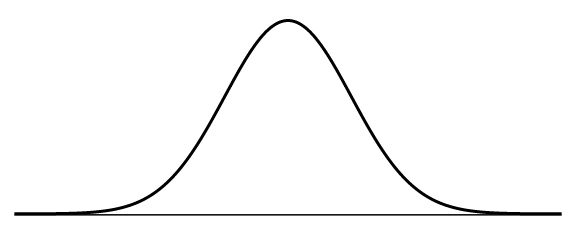

Let's see if the kernels were normally distributed. In the graphs you will generate below, a histogram of the masses of each type of kernel will be generated in gray bars. On top of each histogram you will see a red curve, which represents the normal distribution of the data using the average and standard deviation of the mass.

<font color='green'>Run the next cell by **holding "Shift + Enter"** and you should see two histograms, one for unpopped kernels and another for popped kernels.

<font color='green'>Be sure to add a descriptive plot title, x-axis label, and y-axis label.


<font color='red'>Try changing the number of bins `n_bins` to see how it changes the histograms.

*Hint: The number of bins provided may not be the best way to view the data. Instead find the value for `n_bins` that best represents the data.*</font>

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Text(0, 0.5, 'Y-AXIS LABEL')

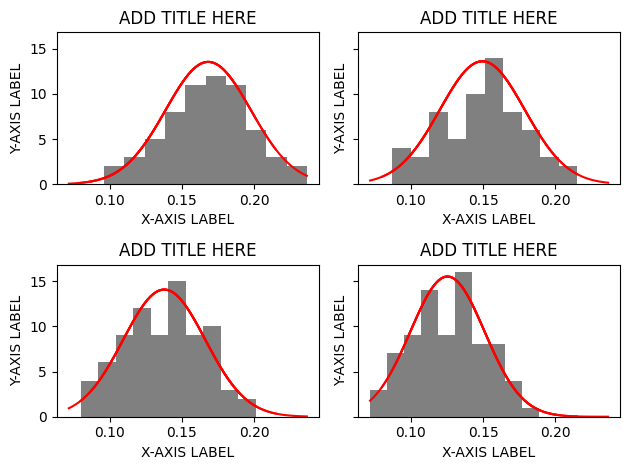

In [63]:
n_bins = 10
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
xg=np.linspace(np.min(data),np.max(data),100)

#Orville Redenbacher Unpopped Histogram
plt.subplot(2,2,1)
plt.hist(OR_Unpopped, bins=n_bins, color = "gray")
OR_Unpopped_gaussian = 1.0/(OR_Unpopped_StandardDeviation*(np.sqrt(2*np.pi)))*np.exp((-0.5*((xg-OR_Unpopped_AverageMass)/(OR_Unpopped_StandardDeviation))**2))
plt.plot(xg,OR_Unpopped_gaussian,'r')
plt.title("ADD TITLE HERE")
plt.xlabel("X-AXIS LABEL")
plt.ylabel("Y-AXIS LABEL")

#Orville Redenbacher Popped Histogram
plt.subplot(2,2,2)
plt.hist(OR_Popped, bins=n_bins, color = "gray")
OR_Popped_gaussian = 1.0/(OR_Popped_StandardDeviation*(np.sqrt(2*np.pi)))*np.exp((-0.5*((xg-OR_Popped_AverageMass)/(OR_Popped_StandardDeviation))**2))
plt.plot(xg,OR_Popped_gaussian,'r')
plt.title("ADD TITLE HERE")
plt.xlabel("X-AXIS LABEL")
plt.ylabel("Y-AXIS LABEL")

#Signature Select Unpopped Histogram
plt.subplot(2,2,3)
plt.hist(SS_Unpopped, bins=n_bins, color = "gray")
SS_Unpopped_gaussian = 1.0/(SS_Unpopped_StandardDeviation*(np.sqrt(2*np.pi)))*np.exp((-0.5*((xg-SS_Unpopped_AverageMass)/(SS_Unpopped_StandardDeviation))**2))
plt.plot(xg,SS_Unpopped_gaussian,'r')
plt.title("ADD TITLE HERE")
plt.xlabel("X-AXIS LABEL")
plt.ylabel("Y-AXIS LABEL")

#Signature Select Popped Histogram
plt.subplot(2,2,4)
plt.hist(SS_Popped, bins=n_bins, color = "gray")
SS_Popped_gaussian = 1.0/(SS_Popped_StandardDeviation*(np.sqrt(2*np.pi)))*np.exp((-0.5*((xg-SS_Popped_AverageMass)/(SS_Popped_StandardDeviation))**2))
plt.plot(xg,SS_Popped_gaussian,'r')
plt.title("ADD TITLE HERE")
plt.xlabel("X-AXIS LABEL")
plt.ylabel("Y-AXIS LABEL")

<font color='green'>Once the figures are ready to save, **right-click** on the image above and select **Save Image As**. Save this image to your computer with a meaningful file name so that you can upload it to Gradescope later.

Let's compare the unpopped and popped kernels for Orville Redenbacher and Signature Select by plotting the histograms on top of each other.

<font color='green'>Run the next cell by **holding "Shift + Enter"** and you should see two histograms, one for unpopped kernels and another for popped kernels.

<font color='green'>Be sure to add a descriptive plot title, x-axis label, and y-axis label.


<font color='red'>Try changing the number of bins `n_bins` to see how it changes the histograms.

*Hint: The number of bins provided may not be the best way to view the data.*</font>

<ipython-input-65-6739f602d0bc>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)
<ipython-input-65-6739f602d0bc>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(222)


Text(0, 0.5, 'Y-AXIS LABEL')

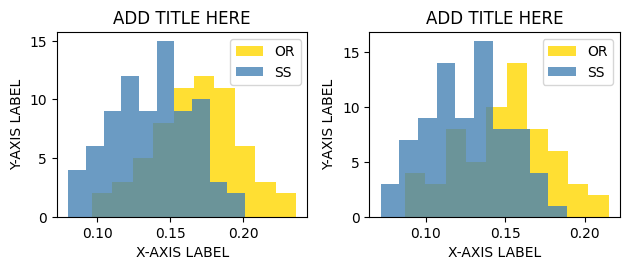

In [65]:
n_bins = 10
fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True)
#Plotting Unpopped Kernel Histogram
plt.subplot(221)
plt.hist(OR_Unpopped, bins=n_bins, label='OR', color = "gold", alpha = 0.8) #Orville Redenbacher Unpopped Data
plt.hist(SS_Unpopped, bins=n_bins, label='SS', color = "steelblue", alpha = 0.8) #Signature Select Unpopped Data
plt.legend(loc="best")
plt.title("ADD TITLE HERE")
plt.xlabel("X-AXIS LABEL")
plt.ylabel("Y-AXIS LABEL")

#Plotting Popped Kernel Histogram
plt.subplot(222)
plt.hist(OR_Popped, bins=n_bins, label='OR', color = "gold", alpha = 0.8) #Orville Redenbacher Popped Data
plt.hist(SS_Popped, bins=n_bins, label='SS', color = "steelblue", alpha = 0.8) #Signature Select Popped Data
plt.legend(loc="best")
plt.title("ADD TITLE HERE")
plt.xlabel("X-AXIS LABEL")
plt.ylabel("Y-AXIS LABEL")


<font color='green'>Once the histograms are ready to save, **right-click** on the image above and select **Save Image As**. Save this image to your computer with a meaningful file name so that you can upload it to Gradescope later.

Now let's compare the unpopped and popped kernels for each brand by plotting the histograms on top of each other.

<font color='green'>Run the next cell by **holding "Shift + Enter"** and you should see two histograms, one for Orville Redenbacher and another for Signature Select.

<font color='green'>Be sure to add a descriptive plot title, x-axis label, and y-axis label.


<font color='red'>Try changing the number of bins `n_bins` to see how it changes the histograms.

*Hint: The number of bins provided may not be the best way to view the data.*</font>

<ipython-input-66-b3ffe507cd5d>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)
<ipython-input-66-b3ffe507cd5d>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(222)


Text(0, 0.5, 'Y-AXIS LABEL')

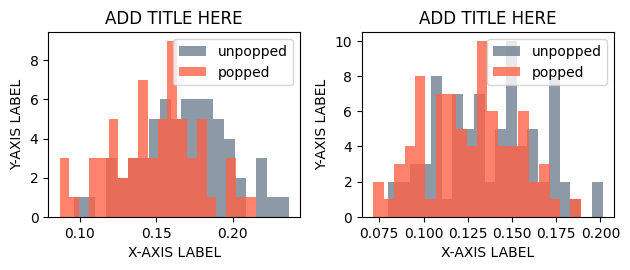

In [66]:
n_bins = 20
fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True)
#Plotting Orville Redenbacher Histogram
plt.subplot(221)
plt.hist(OR_Unpopped, bins=n_bins, label='unpopped', color = "slategray", alpha = 0.8) #Orville Redenbacher Unpopped Data
plt.hist(OR_Popped, bins=n_bins, label='popped', color = "tomato", alpha = 0.8) #Orville Redenbacher Popped Data
plt.legend(loc="best")
plt.title("ADD TITLE HERE")
plt.xlabel("X-AXIS LABEL")
plt.ylabel("Y-AXIS LABEL")

#Plotting Signature Select Histogram
plt.subplot(222)
plt.hist(SS_Unpopped, bins=n_bins, label='unpopped', color = "slategray", alpha = 0.8) #Signature Select Unpopped Data
plt.hist(SS_Popped, bins=n_bins, label='popped', color = "tomato", alpha = 0.8) #Signature Select Popped Data
plt.legend(loc="best")
plt.title("ADD TITLE HERE")
plt.xlabel("X-AXIS LABEL")
plt.ylabel("Y-AXIS LABEL")

<font color='green'>Once the histograms are ready to save, **right-click** on the image above and select **Save Image As**. Save this image to your computer with a meaningful file name so that you can upload it to Gradescope later.

Now let's compare the amount of water lost during popping for each popcorn brand.


Text(0, 0.5, 'Y-AXIS LABEL')

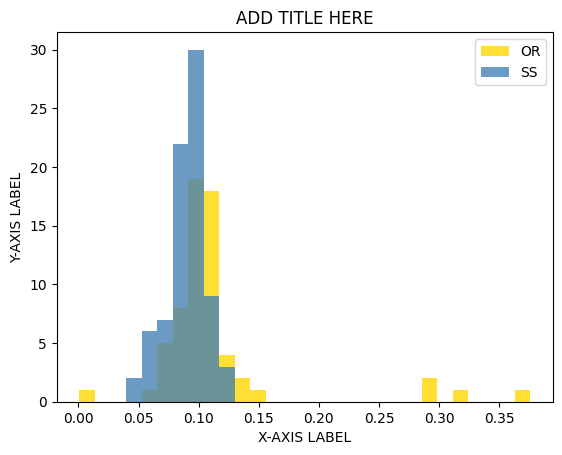

In [70]:
n_bins = 30
new_bins=np.linspace(OR_Relative_WaterLost.min(), OR_Relative_WaterLost.max(), n_bins)
plt.hist(OR_Relative_WaterLost, bins=new_bins, label='OR', color = "gold", alpha = 0.8) #Orville Redenbacher Water Lost Data
plt.hist(SS_Relative_WaterLost, bins=new_bins, label='SS', color = "steelblue", alpha = 0.8) #Signature Select Water Lost Data
plt.legend(loc="best")
plt.title("ADD TITLE HERE")
plt.xlabel("X-AXIS LABEL")
plt.ylabel("Y-AXIS LABEL")

<font color='green'>Once the histogram is ready to save, **right-click** on the image above and select **Save Image As**. Save this image to your computer with a meaningful file name so that you can upload it to Gradescope later.

# Part Three


Now that you have qualitatively evaluated the data, let's run some statistical tests to see if there is a significant difference between Orville Redenbacher and Signature Select kernel masses.

The data we collected is known as an unpaired data set, since the Orville Redenbacher and Signature Select kernels are not directly paired to one another. If we were to compare the masses of unpopped and popped kernels in each brand, this would be considered a paired data set.

<font color='blue'> For an unpaired data set, we set a "null hypothesis" ($H_o$) that the samples are from the same popluation and an "alternative hypothesis" ($H_A$) that the samples are not from the same population.

Now, in order to determine which hypothesis applies to our dataset, we need to perform some calculations.

Since this is an unpaired data set, we first need to determine the degrees of freedom for the system. There are two ways we can determine the degrees of freedome for the system.

<font color='purple'> 1. If the variances are statistically equivalent between Orville Redenbacher and Signature Select kernels,
<font color='purple'>$$\text{DOF}=n_{OR}+n_{SS}-2$$.


<font color='orange'>2. If the variances are statistically different between Orville Redenbacher and Signature Select kernels
<font color='orange'> $$\text{DOF}=\frac{(\frac{s_{OR}^2}{n_{OR}}+\frac{s_{SS}^2}{n_{SS}})^2}{\frac{s_{OR}^2}{n_{OR}^2(n_{OR}-1)}+\frac{s_{SS}^2}{n_{SS}^2(n_{SS}-1)}}$$. *round to the nearest integer


<font color='blue'> Where $s_{OR}$ and $s_{SS}$ are the standard deviations of the samples of Orville Redenbacher and Signature Select kernels, respectively, and $n_{OR}$ and $n_{SS}$ are the number of  Orville Redenbacher and Signature Select kernels, respectively.

First let's determine which method of determining our DOF is applicable, by perfomring an F-test. Using and F-test we are determining whether the standard deviations between Orville Redenbacher and Signature Select kernels is statistically equivalent.

In [71]:
if OR_Unpopped_StandardDeviation > SS_Unpopped_StandardDeviation :
  f_exp=((OR_Unpopped_StandardDeviation)**2)/((SS_Unpopped_StandardDeviation)**2)
else:
  f_exp=((SS_Unpopped_StandardDeviation)**2)/((OR_Unpopped_StandardDeviation)**2)

f_crit=stats.f.ppf(0.05, n_OR-1, n_SS-1)
print("The value for F-exp for unpopped kernels is {:3.4f} ".format(f_exp))
print("The value for F-crit for unpopped kernels is {:3.4f} ".format(f_crit))

The value for F-exp for unpopped kernels is 1.0805 
The value for F-crit for unpopped kernels is 0.6678 


Using the results for the F-test you performed above, if $F_{exp}<F_{crit}$ then we can assume the two standard deviations are statistically equivalent and we can use <font color='purple'> DOF Method 1 <font color='black'>to calculate the degrees of freedom.

However, if $F_{exp}>F_{crit}$ then we must assume the two standard deviations are not statistically equivalent and we must use <font color='orange'> DOF Method 2 <font color='black'>to calculate the degrees of freedom.

### <font color='purple'> DOF Method 1

In [ ]:
DOF=n_OR+n_SS-2
print("The degrees of freedom is equal to {:3.0f}. ".format(DOF))

### <font color='orange'> DOF Method 2

In [ ]:
OR_Unpopped_Variance=OR_Unpopped_StandardDeviation**2
SS_Unpopped_Variance=SS_Unpopped_StandardDeviation**2
DOF=(((OR_Unpopped_Variance/n_OR)+(SS_Unpopped_Variance/n_SS))**2)/((OR_Unpopped_Variance**2/(n_OR**2*(n_OR-1)))+(SS_Unpopped_Variance**2/(n_SS**2*(n_SS-1))))
print("The degrees of freedom is equal to {:3.3f}. ".format(DOF))

Now we can perform a t-test. Depending on which method you used to determine your DOF, there will be a different t-test to perform.

### <font color='purple'> If you used DOF Method 1 follow this equation


Start by changing the value ``x`` in ``DOF=x`` to the degrees of freedom you determined above.

In [ ]:
DOF=x
s_pool=np.sqrt(((n_OR-1)*(OR_Unpopped_Variance)+(n_SS-1)*(SS_Unpopped_Variance))/(n_OR+n_SS-2))
t_exp=np.abs(OR_Unpopped_AverageMass-SS_Unpopped_AverageMass)/(s_pool)*np.sqrt((n_OR*n_SS)/(n_OR+n_SS))
t_crit=stats.t.ppf(0.95, DOF)
print("The t-exp value is equal to {:3.3f}, and the t-critical value is {:3.3f}. ".format(t_exp, t_crit))

If $t_{exp}<t_{crit}$ we accept the null hypothesis ($H_o$). If $t_{exp}>t_{crit}$ we reject the null hypothesis ($H_o$) and thus accept the alternative hypothesis ($H_A$).

### <font color='orange'> If you used DOF Method 2 follow this equation


The DOF must be an integer value. Round your answer from the DOF calculator to the nearest integer and change the value ``x`` in ``DOF=x`` to the degrees of freedom you determined.

In [ ]:
DOF=x
t_exp=np.abs(OR_Unpopped_AverageMass-SS_Unpopped_AverageMass)/(np.sqrt((OR_Unpopped_Variance)/(n_OR)+(SS_Unpopped_Variance)/(n_SS)))
t_crit=stats.t.ppf(0.95, DOF)
print("The t-exp value is equal to {:3.3f}, and the t-critical value is {:3.3f}. ".format(t_exp, t_crit))

If $t_{exp}<t_{crit}$ we accept the null hypothesis ($H_o$). If $t_{exp}>t_{crit}$ we reject the null hypothesis ($H_o$) and thus accept the alternative hypothesis ($H_A$).

#Part Four

Now let's repeat this process for the popped kernels.

Since this is an unpaired data set, we first need to determine the degrees of freedom for the system. There are two ways we can determine the degrees of freedom for the system.

<font color='purple'> 1. If the variances are statistically equivalent between Orville Redenbacher and Signature Select kernels,
<font color='purple'>$$\text{DOF}=n_{OR}+n_{SS}-2$$


<font color='orange'>2. If the variances are statistically different between Orville Redenbacher and Signature Select kernels
<font color='orange'> $$\text{DOF}=\frac{(\frac{s_{OR}^2}{n_{OR}}+\frac{s_{SS}^2}{n_{SS}})^2}{\frac{s_{OR}^2}{n_{OR}^2(n_{OR}-1)}+\frac{s_{SS}^2}{n_{SS}^2(n_{SS}-1)}}$$. *round to the nearest integer


<font color='blue'> Where $s_{OR}$ and $s_{SS}$ are the standard deviations of the samples of Orville Redenbacher and Signature Select kernels, respectively, and $n_{OR}$ and $n_{SS}$ are the number of  Orville Redenbacher and Signature Select kernels, respectively.

In [ ]:
if OR_Popped_StandardDeviation > SS_Popped_StandardDeviation :
  f_exp=((OR_Popped_StandardDeviation)**2)/((SS_Popped_StandardDeviation)**2)
else:
  f_exp=((SS_Popped_StandardDeviation)**2)/((OR_Popped_StandardDeviation)**2)

f_crit=stats.f.ppf(0.05, n_OR-1, n_SS-1)
print("The value for F-exp for popped kernels is {:3.4f} ".format(f_exp))
print("The value for F-crit for popped kernels is {:3.4f} ".format(f_crit))

Using the results for the F-test you performed above, if $F_{exp}<F_{crit}$ then we can assume the two standard deviations are statistically equivalent and we can use <font color='purple'> DOF Method 1 <font color='black'>to calculate the degrees of freedom.

However, if $F_{exp}>F_{crit}$ then we must assume the two standard deviations are not statistically equivalent and we must use <font color='orange'> DOF Method 2 <font color='black'>to calculate the degrees of freedom.

### <font color='purple'> DOF Method 1

In [ ]:
DOF=n_OR+n_SS-2
print("The degrees of freedom is equal to {:3.0f} ".format(DOF))

### <font color='orange'> DOF Method 2

In [ ]:
OR_Popped_Variance=OR_Popped_StandardDeviation**2
SS_Popped_Variance=SS_Popped_StandardDeviation**2
DOF=(((OR_Popped_Variance/n_OR)+(SS_Unpopped_Variance/n_SS))**2)/((OR_Unpopped_Variance**2/(n_OR**2*(n_OR-1)))+(SS_Unpopped_Variance**2/(n_SS**2*(n_SS-1))))
print("The degrees of freedom is equal to {:3.3f} ".format(DOF))

### <font color='purple'> If you used DOF Method 1 follow this equation


Start by changing the value ``x`` in ``DOF=x`` to the degrees of freedom you determined above.

In [ ]:
DOF=x
s_pool=np.sqrt(((n_OR-1)*(OR_Popped_Variance)+(n_SS-1)*(SS_Popped_Variance))/(n_OR+n_SS-2))
t_exp=np.abs(OR_Popped_AverageMass-SS_Popped_AverageMass)/(s_pool)*np.sqrt((n_OR*n_SS)/(n_OR+n_SS))
t_crit=stats.t.ppf(0.95, DOF)
print("The t-exp value is equal to {:3.3f}, and the t-critical value is {:3.3f}. ".format(t_exp, t_crit))

If $t_{exp}<t_{crit}$ we accept the null hypothesis ($H_o$). If $t_{exp}>t_{crit}$ we reject the null hypothesis ($H_o$) and thus accept the alternative hypothesis ($H_A$).

### <font color='orange'> If you used DOF Method 2 follow this equation


The DOF must be an integer value. Round your answer from the DOF calculator to the nearest integer and change the value ``x`` in ``DOF=x`` to the degrees of freedom you determined.

In [ ]:
DOF=x
t_exp=np.abs(OR_Popped_AverageMass-SS_Popped_AverageMass)/(np.sqrt((OR_Popped_Variance)/(n_OR)+(SS_Popped_Variance)/(n_SS)))
t_crit=stats.t.ppf(0.95, DOF)
print("The t-exp value is equal to {:3.3f}, and the t-critical value is {:3.3f}. ".format(t_exp, t_crit))

If $t_{exp}<t_{crit}$ we accept the null hypothesis ($H_o$). If $t_{exp}>t_{crit}$ we reject the null hypothesis ($H_o$) and thus accept the alternative hypothesis ($H_A$).

#Part Five

Now let's repeat this process for the relative water lost during popping.

Since this is an unpaired data set, we first need to determine the degrees of freedom for the system. There are two ways we can determine the degrees of freedome for the system.

<font color='purple'> 1. If the variances are statistically equivalent between Orville Redenbacher and Signature Select kernels,
<font color='purple'>$$\text{DOF}=n_{OR}+n_{SS}-2$$.


<font color='orange'>2. If the variances are statistically different between Orville Redenbacher and Signature Select kernels
<font color='orange'> $$\text{DOF}=\frac{(\frac{s_{OR}^2}{n_{OR}}+\frac{s_{SS}^2}{n_{SS}})^2}{\frac{s_{OR}^2}{n_{OR}^2(n_{OR}-1)}+\frac{s_{SS}^2}{n_{SS}^2(n_{SS}-1)}}$$. *round to the nearest integer


<font color='blue'> Where $s_{OR}$ and $s_{SS}$ are the standard deviations of the samples of Orville Redenbacher and Signature Select kernels, respectively, and $n_{OR}$ and $n_{SS}$ are the number of  Orville Redenbacher and Signature Select kernels, respectively.

In [ ]:
if OR_Relative_WaterLost_StandardDeviation > SS_Relative_WaterLost_StandardDeviation :
  f_exp=((OR_Relative_WaterLost_StandardDeviation)**2)/((SS_Relative_WaterLost_StandardDeviation)**2)
else:
  f_exp=((SS_Relative_WaterLost_StandardDeviation)**2)/((OR_Relative_WaterLost_StandardDeviation)**2)

f_crit=stats.f.ppf(0.05, n_OR-1, n_SS-1)
print("The value for F-exp for the relative water lost is {:3.4f} ".format(f_exp))
print("The value for F-crit for the relative water lost is {:3.4f} ".format(f_crit))

Using the results for the F-test you performed above, if $F_{exp}<F_{crit}$ then we can assume the two standard deviations are statistically equivalent and we can use the first method of determining the DOF.
However, if $F_{exp}>F_{crit}$ then we must assume the two standard deviations are statistically unequivalent and we must use the second method of determining the DOF.

### <font color='purple'> DOF Method 1

In [ ]:
DOF=n_OR+n_SS-2
print("The degrees of freedom is equal to {:3.0f} ".format(DOF))

### <font color='orange'> DOF Method 2

In [ ]:
OR_Relative_WaterLost_Variance=OR_Relative_WaterLost_StandardDeviation**2
SS_Relative_WaterLost_Variance=SS_Relative_WaterLost_StandardDeviation**2
DOF=(((OR_Relative_WaterLost_Variance/n_OR)+(SS_Relative_WaterLost_Variance/n_SS))**2)/((OR_Relative_WaterLost_Variance**2/(n_OR**2*(n_OR-1)))+(SS_Relative_WaterLost_Variance**2/(n_SS**2*(n_SS-1))))
print("The degrees of freedom is equal to {:3.3f} ".format(DOF))

### <font color='purple'> If you used DOF Method 1 follow this equation


Start by changing the value ``x`` in ``DOF=x`` to the degrees of freedom you determined above.

In [ ]:
DOF=x
s_pool=np.sqrt(((n_OR-1)*(OR_WaterLost_Variance)+(n_SS-1)*(SS_WaterLost_Variance))/(n_OR+n_SS-2))
t_exp=np.abs(OR_WaterLost_AverageMass-SS_WaterLost_AverageMass)/(s_pool)*np.sqrt((n_OR*n_SS)/(n_OR+n_SS))
t_crit=stats.t.ppf(0.95, DOF)
print("The t-exp value is equal to {:3.3f}, and the t-critical value is {:3.3f}. ".format(t_exp, t_crit))

If $t_{exp}<t_{crit}$ we accept the null hypothesis ($H_o$). If $t_{exp}>t_{crit}$ we reject the null hypothesis ($H_o$) and thus accept the alternative hypothesis ($H_A$).

### <font color='orange'> If you used DOF Method 2 follow this equation


The DOF must be an integer value. Round your answer from the DOF calculator to the nearest integer and change the value ``x`` in ``DOF=x`` to the degrees of freedom you determined.

In [ ]:
DOF=x
t_exp=np.abs(OR_Relative_WaterLost_AverageMass-SS_Relative_WaterLost_AverageMass)/(np.sqrt((OR_Relative_WaterLost_Variance)/(n_OR)+(SS_Relative_WaterLost_Variance)/(n_SS)))
t_crit=stats.t.ppf(0.95, DOF)
print("The t-exp value is equal to {:3.3f}, and the t-critical value is {:3.3f}. ".format(t_exp, t_crit))

If $t_{exp}<t_{crit}$ we accept the null hypothesis ($H_o$). If $t_{exp}>t_{crit}$ we reject the null hypothesis ($H_o$) and thus accept the alternative hypothesis ($H_A$).

# Part Six



Now let's see if there are any outliers in our datasets.

We will be using the Grubb's test to determine if any piece of data is statistically identified as an outlier. Run the last few cells to determine if any data points are identified as outliers.

If no outliers are detected a message will print to notify you of that finding. If outliers are detected a message and the outlier masses will print.

In [ ]:
OR_UnpoppedOutliers=[]
OR_UnpoppedOutliers = grubbs.min_test_outliers(OR_Unpopped, alpha=.05)
OR_UnpoppedOutliers = OR_UnpoppedOutliers + grubbs.max_test_outliers(OR_Unpopped, alpha=.05)
if OR_UnpoppedOutliers:
  print("Outliers were detected for Orville Redenbacher Unpopped Kernels.")
  print(OR_UnpoppedOutliers)
if not OR_UnpoppedOutliers:
  print("There are no outliers for Orville Redenbacher Unpopped Kernels.")

In [ ]:
OR_PoppedOutliers=[]
OR_PoppedOutliers = grubbs.min_test_outliers(OR_Popped, alpha=.05)
OR_PoppedOutliers = OR_PoppedOutliers + grubbs.max_test_outliers(OR_Popped, alpha=.05)
if OR_PoppedOutliers:
  print("Outliers were detected for Orville Redenbacher Popped Kernels.")
  print(OR_PoppedOutliers)
if not OR_PoppedOutliers:
  print("There are no outliers for Orville Redenbacher Popped Kernels.")

In [ ]:
SS_UnpoppedOutliers=[]
SS_UnpoppedOutliers = grubbs.min_test_outliers(SS_Unpopped, alpha=.05)
SS_UnpoppedOutliers = SS_UnpoppedOutliers + grubbs.max_test_outliers(SS_Unpopped, alpha=.05)
if SS_UnpoppedOutliers:
  print("Outliers were detected for Signature Select Unpopped Kernels.")
  print(SS_UnpoppedOutliers)
if not SS_UnpoppedOutliers:
  print("There are no outliers for Signature Select Unpopped Kernels.")

In [ ]:
SS_PoppedOutliers=[]
SS_PoppedOutliers = grubbs.min_test_outliers(SS_Popped, alpha=.05)
SS_PoppedOutliers = SS_PoppedOutliers + grubbs.max_test_outliers(SS_Popped, alpha=.05)
if SS_PoppedOutliers:
  print("Outliers were detected for Signature Select Popped Kernels.")
  print(SS_PoppedOutliers)
if not SS_PoppedOutliers:
  print("There are no outliers for Signature Select Popped Kernels.")

In [ ]:
OR_Relative_WaterLostOutliers=[]
OR_Relative_WaterLostOutliers = grubbs.min_test_outliers(OR_Relative_WaterLost, alpha=.05)

if OR_Relative_WaterLostOutliers:
  print("Outliers were detected for the relative water lost during popping for Orville Redenbacher Kernels.")
  print(OR_Relative_WaterLostOutliers)
if not OR_Relative_WaterLostOutliers:
  print("There are no outliers for the relative water lost during popping for Orville Redenbacher Kernels.")


In [ ]:
SS_Relative_WaterLostOutliers=[]
SS_Relative_WaterLostOutliers = grubbs.min_test_outliers(SS_Relative_WaterLost, alpha=.05)
SS_Relative_WaterLostOutliers = SS_Relative_WaterLostOutliers + grubbs.max_test_outliers(SS_Relative_WaterLost, alpha=.05)
if SS_Relative_WaterLostOutliers:
  print("Outliers were detected for the relative water lost during popping for Sigature Select Kernels.")
  print(SS_Relative_WaterLostOutliers)
if not SS_Relative_WaterLostOutliers:
  print("There are no outliers for the relative water lost during popping for Signature Select Kernels.")